# Part 1

Neural Network Assignment #1

Ahmad Omar Javed 
Id: 1001877250

Neel Suthar
Id: 1001807983

Praneeth Pavurala
Id: 1001841991

The objective is to create a convolution neural network with 5 layers of each with neurons = [input size, 1024, 256, 128, 10]
We create random weights and biases for each layer and do forward and backward propogation for the CNN. 

Colab link: https://colab.research.google.com/drive/1tpHHS4jQz4rzsav-gAsAVOzy-dbeeWPS#scrollTo=qbju-U64sux_

In [ ]:
#download CIFAR10 dataset from pytorch
import torch, torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

In [ ]:
""" Pre-processing the dataset """
# get X input from trainset
X_train = trainset.data
print(X_train.shape)
# flatten (50000,32,32,3) size of X into (3072,50000) size of matrix
# normalize each pixel value to between 0 and 1
X_train = X_train.reshape(X_train.shape[0],-1).T / 255
print(X_train.shape)
# did the same thing on testset: got X input and flatten it
X_test = testset.data
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0],-1).T / 255
print(X_test.shape)
# get label y from trainset
y_train = trainset.targets
print("y_train " , y_train)
# reshape y from list to numpy array
y_train = np.reshape(np.asarray(y_train),(50000,))
print(y_train.shape)
# did the same thing on testset: got y label and reshape it
y_test = testset.targets
y_test = np.reshape(np.asarray(y_test),(10000,))
print(y_test.shape)

# function takes X input and y labels and ratio to split validation set
def split(X, y, val_ratio):
  val_number = int(val_ratio * X.shape[1]) 
  random_indice = np.random.permutation(X.shape[1])
  return X[:, random_indice[val_number:]],y[random_indice[val_number:]], X[:, random_indice[:val_number]], y[[random_indice[:val_number]]]
# split validation set from training set
X_train, y_train, X_val, y_val = split(X_train, y_train, val_ratio = 0.1)


(50000, 32, 32, 3)
(3072, 50000)
(10000, 32, 32, 3)
(3072, 10000)
y_train  [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

class NeuralNetwork():
    
    def __init__(self, layer_dims):
        """
        Arguments:
        layer_dims -- A list contains the dimensions of each layer in CNN.
    
        Attributes generated:
        parameters -- a dict contains parameters "W1", "b1", ..., "WL", "bL"of each corresponding layer
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        num_layers -- the length of layer_dims list
        """
     
        np.random.seed(1)
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.parameters = {}
        L = len(self.layer_dims)
        for l in range(1, L):
            self.parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
            self.parameters['b'+ str(l)] = np.zeros([layer_dims[l], 1])
        self.X_val = None
        self.y_val = None
        

    def affineForward(self, A, W, b):
        """
         Implement the linear portion of CNN's forward propagation.

          Arguments:
          A -- activation from previous layer 
          W -- weights matrix
          b -- bias vector

          Returns:
          Z -- the input of the activation function
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
        Z = np.dot(W,A) + b
        cache = (A,W,b,Z)
        return Z, cache

    def activationForward(self, Z, activation="relu"):
        """
         Implement the linear to activation portion of CNN's forward propagation

          Arguments:
          Z -- output from linear portion of forward propagation
          activation(type) -- "relu" in this case

          Returns:
          A -- the ouput of relu activation
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
        if(activation == "relu"):
          A = np.maximum(0,Z)
        assert(A.shape == Z.shape)
        return A
            

    def forwardPropagation(self, X):
        """
        Implement the forward propagation 

        Arguments:
        X -- input from input layer as the starting point of forward propagation
  
        Returns:
        A -- the output of the activation function for each layer
        caches -- a list stores parameters (cache) for each layer during forward propagation
        """
        A = []
        caches = []
        caches.append(())
        L = self.num_layers
        # print(L)
        Z = []
        A.append(X)
        for l in range(1, L):
          A_prev = A[-1]
          W = self.parameters['W'+ str(l)]
          b = self.parameters['b' + str(l)]
          Z, cache = self.affineForward(A_prev, W, b)
          caches.append(cache)
          A.append(self.activationForward(Z, "relu"))
        AL = self.softmax(Z)
        # print(A[0])
        # print(Z[0])
        # print(self.softmax(Z)[0])
        return AL, caches
      
      
    def softmax(self,AL):
        """
        Implement the softmax function 

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
  
        Returns:
        p -- softmax probability
        """
        m = AL.shape[0]
        p = np.exp(AL - np.max(AL, axis=0, keepdims=True))
        p /= np.sum(p, axis=0, keepdims=True)
        return p
      
      
    def costFunction(self, AL, y):

        """
        Implement the cross entrophy loss

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        cost -- the cross entropy loss value of each iteration of forward propagation
        """
        m = AL.shape[0]
        # y = np.reshape(y, (-1,1))
        # y_cap = np.argmax(AL, axis = 0)
        # y_cap = y_cap[:,np.newaxis]
        # for i in range(len(y)):
        #   print(y[i] , y_cap[i])
        
        
        # y_cap = AL
        # cost = -np.log(y_cap[range(m),y])
        # cost = np.sum(cost)/m
        
        """
        Y = self.softmax(y)
        y_cap = AL
        """
        cost = -np.sum(y * np.log(AL.T + 1e-8))/m

        return cost
      
      
    def derivative_cost(self, AL, y): 
        """
        Implement the first step of back propagation: the derivative of cost function over AL

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        dAL -- the derivative of cost function over AL
        """
        
        # m = AL.shape[0]
        # y = np.reshape(y, (-1,1))
        # y_cap = AL
        # dAL = y_cap
        # dAL[range(m),y] -= 1
        # dAL = dAL/m
        

        # y = np.reshape(y,(-1,1))
        # Y = self.softmax(y)
        dAL = AL - y.T
        return dAL

    def affineBackward(self, dA_prev, cache):
        """
        Implement the linear portion of backward propagation of one layer (layer l)

        Arguments:
        dAL -- derivative of the cost with respect to the activation output (of current layer l)
        cache -- releases A, W, b, Z values stored from the tuple during forward propagation of layer l

        Returns:
        dA -- Gradient of the cost over activation output from previous layer (layer l-1)
        dW -- Gradient of the cost over W for the current layer(layerl)
        db -- Gradient of the cost over b for the current layer(layer1)
        """
        A,W,b,Z = cache

        # dZ = dA_prev
        dZ = self.activationBackward(dA_prev, cache, "relu")
        m = A.shape[0]
        # print(A.shape)
        dW = 1/m*np.dot(dZ, A.T)
        db = 1/m*np.sum(dZ, axis = 1, keepdims = True)
        dA = np.dot(W.T, dZ)
       
        # print(dA.shape == A.shape)
        # print(dW.shape == W.shape)
        # print(db.shape == b.shape)
        return dA, dW, db
    
    def activationBackward(self, dA, cache, activation="relu"):
        """
        Implement the derivative of cost function over relu activation input Z

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
        activation(type) -- 'relu'
  
        Returns:
        relu_backward -- the derivative of cost function over Z
        """
      
        relu_backward = self.derivative_relu(dA, cache) 
        return relu_backward 
        
    def derivative_relu(self, dA, cache):
        """
        Implement the derivative calculation of relu activation during backpropagation

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
  
        Returns:
        dZ -- the derivative of cost function over Z
        """
        Z = cache[3]
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        return dZ

    def backPropagation(self, dAL, y, caches):
        """
        Implement backpropagation for each layer

        Arguments:
        dAL -- the gradient of cost function over the activation output of last layer: starting point for backpropagation
        y -- the labels of data
        caches -- a list stores tuple of A,W,b,Z for each layer
  
        Returns:
        grads -- a dict stores dWl and dbl for each layer l
        """
        
        """dError/dAL --> --> dAL/dZ4 --> dZ4/dW4, dZ4/dA3, dZ4/db4 --> dA3/dZ3 --> dZ3/dW3,dZ3/dA2,dZ3/db3"""
        
        grads = {}
        L = self.num_layers

        current_cache = caches[L-1]

        # dA = self.activationBackward(dAL, current_cache)
        dZ = dAL
        m = y.shape[0]
        A,W,b,Z = current_cache
        grads['dW4'] = dW = 1/m*np.dot(dZ, A.T)
        grads['db4'] = db = 1/m*np.sum(dZ, axis = 1, keepdims = True)
        dA = np.dot(W.T, dZ)
        # print(dA.shape == A.shape)
        # print(dW.shape == W.shape)
        # print(db.shape == b.shape)
        for l in range(L-2,0,-1):
          current_cache = caches[l]
          dA, dW, db = self.affineBackward(dA, current_cache)
          grads['dW' + str(l)] = dW
          grads['db' + str(l)] = db
        return grads

    def updateParameters(self, grads, alpha):
        """
        Use gradient descent to implement parameters update
    
        Arguments:
        grads -- a dict stores all parameters gradients for each layer
        alpha -- learning rate
    
        Returns:
        self.parameters -- a dict stores updated parameters for W and b of each layer 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
        """
        L = self.num_layers
        for l in range(1,L):
          self.parameters['W' + str(l)] = self.parameters['W' + str(l)] - alpha * grads['dW' + str(l)]
          self.parameters['b' + str(l)] = self.parameters['b' + str(l)] - alpha * grads['db' + str(l)]
        return self.parameters
      
        
    def normalized_X(self,X):
        """
        Standardize the input data by substract mean and divided by variance
        
        Arguments:
        X -- input data
        
        Return:
        norm_X -- standardized data
        """
      
        standardize = {}
        standardize['mean'] = np.mean(X, axis = 1, keepdims = True)
        standardize['var'] = np.var(X, axis = 1, keepdims = True)
        norm_X = (X - standardize['mean']) / np.sqrt(standardize['var'])
        return norm_X

    def encode(self, y_batch):
      Y = list()
      for i in range(y_batch.shape[0]):
        temp = [0]*self.layer_dims[-1]
        temp[y_batch[i]] = 1
        Y.append(temp)
      Y = np.array(Y)
      return Y



    def train(self, X, y, iters, alpha, batch_size, print_every):
        """
        It takes advantage of every function in this class to implement training and validation using CNN.
        
        Arguments:
        X -- input data
        y -- labels of data
        iters -- number of iterations to run
        alpha -- learning rate
        batch_size -- number of samples to assign to minibatch
        print_every -- number of iterations to print
        
        Return:
        Numbewr of iterations, train loss, train_acc, and valid_acc in every 100 iterations
        
        """
     
        X = self.normalized_X(X)
        
        for i in range(0, iters):
            X_batch, y_batch = self.get_batch(X, y, batch_size)
            AL, cache = self.forwardPropagation(X_batch)
            # print(y_batch)
            # enc = OneHotEncoder(sparse=False, categories='auto')
            # train_Y = enc.fit_transform(y.reshape(len(y), -1))
            # Y = enc.transform(y_batch.reshape(len(y_batch), -1))
            Y = self.encode(y_batch)
            # print(Y)
            
            loss = self.costFunction(AL, Y)
            dAL = self.derivative_cost(AL, Y)
            grads = self.backPropagation(dAL, y_batch, cache)
            self.updateParameters(grads, alpha)
            # print(np.argmax(AL, axis = 0))
            if i % print_every == 0:
                # print(y_batch)
                train_acc = self.score(self.predict(X), y)
                val_acc = self.score(self.predict(self.X_val), self.y_val)
                print('iter={:5}, loss={:.4f}, train_acc={:.4f}, validation_acc={:.4f}'.format(i, loss, train_acc*100, val_acc*100))
                
    def predict(self, X):
        """
        It predicts the label given . input x
        Argument:
        X -- input of data
        Return:
        y_pred -- predicted label
        """
        X = self.normalized_X(X)
        AL, _ = self.forwardPropagation(X)
        y_pred = np.argmax(AL, axis = 0)
        # print(y_pred)
        return y_pred
      
      
    def score(self, y_pred, y_true):
        """
        It calculates the percentage of correct predicted labels over true labels
        
        Argument:
        y_pred-- predicted labels
        y_true -- true labels
        
        REturn: percentage of correct predicted labels
        """
        correct = np.mean(y_pred == y_true)
        return correct
      
    def load_validation_set(self, X_val, y_val):
        """
        Load validation set to CNN
        """
        self.X_val = X_val
        self.y_val = y_val
  

    def get_batch(self, X, y, batch_size):
        """
        Load minibatch to CNN
        """
       
        batch_index = np.random.randint(X.shape[1], size = batch_size)
        X_batch = X[:, batch_index]
        y_batch = y[batch_index]
        return X_batch, y_batch
   

In [ ]:
"""
Train CNN and validate at the same time
"""
# I tried in different architecture of CNN and it turns out 3 hidden layers of 1024, 256, 128 neurons gives me best reslt
# I also tried different learning drate and batch size and it turns out alpha=1 and batch_size=100 gives me best result
# In this trained CNN, I reach 54.12% validation accuracy and 52.99% test accuracy in the end.
layer_dims = [X_train.shape[0], 1024, 256, 128, 10]
CNN = NeuralNetwork(layer_dims)
CNN.load_validation_set(X_val, y_val)
CNN.train(X_train, y_train, iters=10000, alpha=1, batch_size=100, print_every=100)

iter=    0, loss=23.7243, train_acc=12.4022, validation_acc=12.6200
iter=  100, loss=18.0858, train_acc=36.6533, validation_acc=35.8200
iter=  200, loss=17.0818, train_acc=42.1933, validation_acc=40.1600
iter=  300, loss=14.9200, train_acc=46.2778, validation_acc=43.3000
iter=  400, loss=14.3648, train_acc=47.8844, validation_acc=43.7400
iter=  500, loss=13.9361, train_acc=51.0800, validation_acc=46.4600
iter=  600, loss=14.1473, train_acc=51.4067, validation_acc=46.0800
iter=  700, loss=13.2601, train_acc=50.8778, validation_acc=45.6800
iter=  800, loss=10.1603, train_acc=55.2844, validation_acc=47.4800
iter=  900, loss=12.7166, train_acc=53.7511, validation_acc=46.4000
iter= 1000, loss=13.4914, train_acc=54.3022, validation_acc=46.4400
iter= 1100, loss=12.8075, train_acc=56.5378, validation_acc=47.4400
iter= 1200, loss=10.8207, train_acc=57.6533, validation_acc=48.4400
iter= 1300, loss=12.1290, train_acc=58.9578, validation_acc=48.7600
iter= 1400, loss=10.2568, train_acc=58.7644, val

In [ ]:
#test set accuracy
y_pred = CNN.predict(X_test)
test_acc = CNN.score(y_pred, y_test)
print('test_acc ={:4}'.format(test_acc))

test_acc =0.51


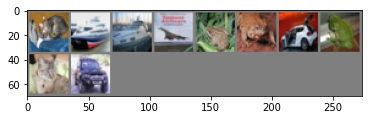

testlabels:   cat  ship  ship plane  frog  frog   car  frog   cat   car
predlabels: plane  ship  ship  ship  frog  frog   car  frog  deer   car


In [ ]:
#visualize the prediction result of trained CNN on some of test set images
import torchvision
import torchvision.transforms as transforms
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("testlabels: " + ' '.join('%5s' % classes[labels[j]] for j in range(10)))
print("predlabels: " + ' '.join('%5s' % classes[y_pred[j]] for j in range(10)))

# Part 2


Neural Network Assignment #1 Part 2

Ahmad Omar Javed
Id: 1001877250

Neel Suthar
Id: 1001807983

Praneeth Pavurala
Id: 1001841991

Colab Link: https://colab.research.google.com/drive/1rk75R2cNhovNjJk6oJkTzSuPkQeksfsY

In [1]:
#download CIFAR10 dataset from pytorch
import torch, torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 30, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.norm1 = nn.BatchNorm2d(30)
        self.conv2 = nn.Conv2d(30, 60, 3)
        self.norm2 = nn.BatchNorm2d(60)
        self.conv3 = nn.Conv2d(60, 100, 3)
        self.norm3 = nn.BatchNorm2d(100)

        self.fc1 = nn.Linear(100 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64,10)

    def forward(self, x):
        x = self.pool(self.norm1(F.relu(self.conv1(x))))
        # print(x.shape)
        x = self.pool(self.norm2(F.relu(self.conv2(x))))
        # print(x.shape)
        x = self.pool(self.norm3(F.relu(self.conv3(x))))
        # print(x.shape)
        x = x.view(-1, 100 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        a = nn.LogSoftmax(dim = 1)
        x = a(self.fc6(x))
        # x = self.fc6(x)
        return x


net = NeuralNet()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


NeuralNet(
  (conv1): Conv2d(3, 30, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(30, 60, kernel_size=(3, 3), stride=(1, 1))
  (norm2): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(60, 100, kernel_size=(3, 3), stride=(1, 1))
  (norm3): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net.forward(inputs)
        # print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)
print('Finished Training')

[1,  2000] loss: 2.161
[1,  4000] loss: 1.842
[1,  6000] loss: 1.691
[1,  8000] loss: 1.564
[1, 10000] loss: 1.477
[1, 12000] loss: 1.432
[2,  2000] loss: 1.324
[2,  4000] loss: 1.281
[2,  6000] loss: 1.242
[2,  8000] loss: 1.206
[2, 10000] loss: 1.200
[2, 12000] loss: 1.159
[3,  2000] loss: 1.073
[3,  4000] loss: 1.045
[3,  6000] loss: 1.033
[3,  8000] loss: 1.028
[3, 10000] loss: 1.012
[3, 12000] loss: 1.003
[4,  2000] loss: 0.898
[4,  4000] loss: 0.919
[4,  6000] loss: 0.906
[4,  8000] loss: 0.916
[4, 10000] loss: 0.908
[4, 12000] loss: 0.864
[5,  2000] loss: 0.782
[5,  4000] loss: 0.789
[5,  6000] loss: 0.791
[5,  8000] loss: 0.790
[5, 10000] loss: 0.814
[5, 12000] loss: 0.797
[6,  2000] loss: 0.716
[6,  4000] loss: 0.686
[6,  6000] loss: 0.718
[6,  8000] loss: 0.721
[6, 10000] loss: 0.715
[6, 12000] loss: 0.739
[7,  2000] loss: 0.605
[7,  4000] loss: 0.635
[7,  6000] loss: 0.636
[7,  8000] loss: 0.678
[7, 10000] loss: 0.656
[7, 12000] loss: 0.661
[8,  2000] loss: 0.545
[8,  4000] 

Accuracy of the network on the 10000 test images: 71 %
Accuracy of plane : 77 %
Accuracy of   car : 81 %
Accuracy of  bird : 55 %
Accuracy of   cat : 51 %
Accuracy of  deer : 66 %
Accuracy of   dog : 69 %
Accuracy of  frog : 83 %
Accuracy of horse : 71 %
Accuracy of  ship : 81 %
Accuracy of truck : 80 %


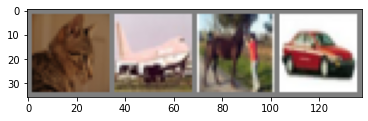

GroundTruth:    cat plane horse   car
Predicted:    cat plane horse   car


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = NeuralNet()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)



print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


With 2 convolutional layers (3->6, 6->12) and 3 linear layers(input->120->84->10).

I tried reducing the kernel size from 5 to 3.

---
For Kernel size 5 with 10 epochs we get:

Accuracy of the network on the 10000 test images: 59 %

Accuracy of plane : 63 %

Accuracy of   car : 74 %

Accuracy of  bird : 45 %

Accuracy of   cat : 26 %

Accuracy of  deer : 58 %

Accuracy of   dog : 46 %

Accuracy of  frog : 72 %

Accuracy of horse : 61 %

Accuracy of  ship : 76 %

Accuracy of truck : 67 %

---
For Kernel size 3 with 10 epochs we get:

Accuracy of the network on the 10000 test images: 59 %

Accuracy of plane : 65 %

Accuracy of   car : 72 %

Accuracy of  bird : 38 %

Accuracy of   cat : 46 %

Accuracy of  deer : 41 %

Accuracy of   dog : 51 %

Accuracy of  frog : 68 %

Accuracy of horse : 63 %

Accuracy of  ship : 72 %

Accuracy of truck : 73 %

---
From above observation we can say that for some labels the training accuracy increase and for other training accuracy decreases. Kernel decides whether the neural network analyses smaller details or larger details.





With 2 Convolutional Layers(3->30, 30->60) and 3 Linear Layers(input->120->84->10):
In this attempt I took Kernel size as 3x3, but I increase the number of output channels in convolutional layers. The output of 1st layer is 30 and second is 60.


---


For kernel size 3x3 and 10 epochs, I got following results:

Accuracy of the network on the 10000 test images: 65 %

Accuracy of plane : 73 %

Accuracy of   car : 85 %

Accuracy of  bird : 26 %

Accuracy of   cat : 43 %

Accuracy of  deer : 57 %

Accuracy of   dog : 63 %

Accuracy of  frog : 78 %

Accuracy of horse : 74 %

Accuracy of  ship : 73 %

Accuracy of truck : 76 %


I tried changing the final activation function from softmax to logsoftmax with the same architecture as above.


---


The following results were obtained on changing the activation function of final linear layer to logsoftmax with 10 epochs:

Accuracy of the network on the 10000 test images: 69 %

Accuracy of plane : 72 %

Accuracy of   car : 79 %

Accuracy of  bird : 60 %

Accuracy of   cat : 39 %

Accuracy of  deer : 67 %

Accuracy of   dog : 63 %

Accuracy of  frog : 78 %

Accuracy of horse : 75 %

Accuracy of  ship : 82 %

Accuracy of truck : 75 %


---


We can see from other observation that the activation function plays a huge role in increasing the accuracy of the neural network just like the architecture.

I changed the structure of neural network again. This time I used 3 convolutional layers and 6 linear layers.

On running the input through this neural network with 10 epochs the following result is obtained:



---

Accuracy of the network on the 10000 test images: 71 %

Accuracy of plane : 75 %

Accuracy of   car : 86 %

Accuracy of  bird : 45 %

Accuracy of   cat : 57 %

Accuracy of  deer : 69 %

Accuracy of   dog : 59 %

Accuracy of  frog : 81 %

Accuracy of horse : 78 %

Accuracy of  ship : 81 %

Accuracy of truck : 75 %


---
Thus we can see that there is a 2% increase in the accuracy, it is due to increase in linear as well as convolutional layers.



